# <center> Lending Club Case Study


## Table of Content

1. [Introduction](#Introduction)
2. [Important Settings](#Important-Settings)
3. [Data Understanding](#Data-Understanding)  
4. [Data Cleaning and Manipulation](#Data-Cleaning-and-Manipulation)
    1. [Dropping Data](#Dropping-Data)
    2. [Formatting Data](#Formatting-Data)
    3. [Derived Data](#Derived-Data)
5. [Data Analysis](#Data-Analysis)
    1. [Univariable Analysis](#Univariable-Analysis)
        1. [Plot Loan Numeric Data](#Plot-Loan-Numeric-Data)
        2. [Plot Loan Categorical Data](#Plot-Loan-Categorical-Data)
        3. [Plot Customer Numeric Data](#Plot-Customer-Categorical-Data)
        4. [Plot Customer Categorical Data](#Plot-Customer-Categorical-Data)
    2. [Bivariable Analysis](#Bivariable-Analysis)
6. [Conclusions and Observations](#Conclusions-and-Observations)

# Introduction 

### Group members:
* Pavan Narra (https://github.com/pavan440)
* Jheser Guzman (https://github.com/dicotips)

## Business Understanding

**Source:** UpGrad Assignment description

*You work for a **consumer finance** company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two **types of risks** are associated with the bank’s decision:*

* *If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business** to the company*

* *If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company*

*The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.*

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. **Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

  * **Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

  * **Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

  * **Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. **Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)



# Important Settings

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Ignore version warnings
import warnings
warnings.filterwarnings('ignore')

# Setting the format of Float numbers to two digits.
pd.options.display.float_format = '{:.2f}'.format 

In [2]:
# Reading CSV file with dtype object and saving it in raw_data dataframe. 
# All the processing in the data will be stored in new dataframes

# Set Dataset File Path
DATA_FILE_PATH = '_dataset/loan.csv'

raw_data = pd.read_csv(DATA_FILE_PATH, dtype=object)

# Important Custom Functions

In [3]:
def univar_plot(dataframe, column, var_type , hue = None):
    
    '''
    univar_plot function plots a column from a dataframe.
    dataframe  : dataframe variable
    column     : Column name
    var_type   : variable type to specify i it is continuos or categorical
                Continuos=0   ==> Graph contains:  Distribution, Violin & Boxplot.
                Categorical=1 ==> Graph contains:  Countplot.
    hue        : Only for categorical data (coloring).
    
    '''
    sns.set(style="darkgrid")
    
    if var_type == 0:
        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
        
        ax[0].set_title("Distribution Plot")
        sns.distplot(dataframe[column],ax=ax[0])
        
        ax[1].set_title("Violin Plot")
        sns.violinplot(data=dataframe, x=column, ax=ax[1], inner = "quartile")
        
        ax[2].set_title("Box Plot")
        sns.boxplot(data=dataframe, x=column, ax=ax[2], orient='v')
    
    if var_type == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(dataframe[column].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = dataframe, x=column, order=dataframe[column].value_counts().index, hue=hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(dataframe))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

## Data Understanding
* Ensure data quality:  identify issues and report them. 
* Interpreted the meaning of the variables and describe the actions in as comments.

In [4]:
# Getting the first 5 rows from the raw_data dataframe for data exploration
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [5]:
# Understanding the structure of the dataset
# Checking shape & datatype of raw_data dataframe
print(raw_data.shape)
print(raw_data.info())

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB
None


In [6]:
print(raw_data.dtypes)

id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
                               ...  
tax_liens                     object
tot_hi_cred_lim               object
total_bal_ex_mort             object
total_bc_limit                object
total_il_high_credit_limit    object
Length: 111, dtype: object


In [7]:
# We verify if there is any dublicated rows in ['id', 'member_id']

print(raw_data.duplicated(subset=None, keep='first').count())
sum(raw_data.duplicated(['id']))

## Result: There are no duplicated IDs !!!

39717


0

In [8]:
print(raw_data.duplicated(subset=None, keep='first').count())
sum(raw_data.duplicated(['member_id']))

## Result: There are no duplicated member_ids !!!

39717


0

In [9]:
# Checking how many rows have all missing values
empty_rows = raw_data.isnull().all(axis=1).sum()
print(f'N Empty Rows: {empty_rows}')

## Result: There are 54 columns have all missing values.

N Empty Rows: 0


In [10]:
# Checking how many columns have all missing values
empty_columns = raw_data.isnull().all(axis=0).sum()
print(f'N Empty Columns: {empty_columns}')

## Result: There are 54 columns with no data in it (all data is null in those columns).

N Empty Columns: 54


In [11]:
# Counting Nulls in each column
raw_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## Data Cleaning and Manipulation

* Data quality issues are addressed
 * Missing value imputation.
 * Outlier treatment.
 * Remove data redundancies.
* If needed, converted data to a suitable and convenient format to work with using the right methods.
* Manipulation of strings and dates is done correctly wherever required.

### Dropping Data

In [12]:
# Verifying how much memory is used by raw_data dataframe
raw_data_size_mb = format(sys.getsizeof(raw_data) /(1028**2), '.0f')

print(f'Raw_Data Memory Usage: {raw_data_size_mb}MB')

Raw_Data Memory Usage: 207MB


In [13]:
# Creating a copy of 'raw_data' to clean & transform data
## Dropping columns with all null values
columuns_all_null = raw_data.columns[raw_data.isnull().sum() == raw_data.shape[0]]
print(columuns_all_null)

cleaned_data = raw_data.drop(columns=columuns_all_null) 

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [14]:
# Counting Nulls in each column
cleaned_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [15]:
# Dropping all rows that are with loan_status as 'Current', since they are still in progress of monthly payments and are not part of our analysis
cleaned_data = cleaned_data[cleaned_data.loan_status != "Current"]

In [16]:
# Droping additional columns we don't need since these are mostly nulls.
## Creating a list of Column names to be dropped
drop_columns = []

# * 'desc' is a plain text of description. It will not needed in this analysis
drop_columns.append('desc')
cleaned_data.desc.head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
5                                                  NaN
Name: desc, dtype: object

In [17]:
# Dropping following columns since they have too many Null values.
drop_columns.extend(["mths_since_last_delinq","mths_since_last_record","next_pymnt_d"])
print(cleaned_data.mths_since_last_delinq.value_counts())
print(cleaned_data.mths_since_last_record.value_counts())
print(cleaned_data.next_pymnt_d.value_counts())

0      443
15     244
23     243
30     243
24     236
      ... 
85       1
95       1
115      1
107      1
97       1
Name: mths_since_last_delinq, Length: 95, dtype: int64
0      670
104     60
113     58
89      57
111     56
      ... 
20       1
19       1
12       1
5        1
7        1
Name: mths_since_last_record, Length: 111, dtype: int64
Series([], Name: next_pymnt_d, dtype: int64)


In [18]:
# Before Dropping
cleaned_data.isnull().sum()
print(cleaned_data.shape)

(38577, 57)


In [19]:
cleaned_data.drop(columns=drop_columns, inplace=True)
print(cleaned_data.shape)

(38577, 53)


In [20]:
# Dropping columns with all different values. They will not add value to the analysis.
## Dropping 'id' column
drop_columns = ['id']
print('id different values: ', end='')
print(cleaned_data.id.value_counts().count())

## Dropping 'member_id' column
drop_columns.append('member_id')
print('member_id different values: ', end='')
print(cleaned_data.member_id.value_counts().count())

## Dropping 'url' column since it has all different values
drop_columns.append('url')
print('url different values: ' , end='')
print(cleaned_data.url.value_counts().count())

id different values: 38577
member_id different values: 38577
url different values: 38577


In [21]:
# Dropping 'tax_liens' column since it has only one value 0
drop_columns.append('tax_liens')
print('tax_liens value count: ', end='')
print(cleaned_data.tax_liens.value_counts())

# Dropping 'initial_list_status' since it has only one value
drop_columns.append('initial_list_status')

# Dropping 'pymnt_plan' since it has only one value
drop_columns.append('pymnt_plan')

# Dropping 'acc_now_delinq' since it has only one value
drop_columns.append('acc_now_delinq')

# Dropping 'acc_now_delinq' since it has only one value 0s
drop_columns.append('delinq_amnt')

# Dropping 'policy_code' since it has only one value.
drop_columns.append('policy_code')

# Dropping 'application_type' since it has only one value.
drop_columns.append('application_type')

# Dropping 'emp_title' since it has too many different discrete values
drop_columns.append('emp_title')
print('emp_title different values: ' , end='')
print(cleaned_data.emp_title.value_counts().count())

# Dropping 'zip_code' since the dataset is too small for the universe of zip_codes in the country
drop_columns.append('zip_code')

tax_liens value count: 0    38538
Name: tax_liens, dtype: int64
emp_title different values: 28027


In [22]:
cleaned_data.drop(columns=drop_columns, inplace=True)

In [23]:
## Dropping Behavioral fields since the scope of the analysis is only based on the Customer Profile and Loan Characteristics

print(cleaned_data.columns)
drop_behavioral_columns = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 
                           'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 
                           'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                           'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
                           'collections_12_mths_ex_med', 'chargeoff_within_12_mths', ]

cleaned_data.drop(columns=drop_behavioral_columns, inplace=True)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies'],
      dtype='object')


In [24]:
# After cleaning all the irrelevant columns for the analysis, we are left with a dataframe of 20 columns
cleaned_data.shape

(38577, 20)

### Formatting Data

In [25]:
# Exploring the dataset data-types before any format change
cleaned_data.dtypes

loan_amnt               object
funded_amnt             object
funded_amnt_inv         object
term                    object
int_rate                object
installment             object
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc              object
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
title                   object
addr_state              object
dti                     object
total_pymnt             object
pub_rec_bankruptcies    object
dtype: object

In [26]:
# Formatting employment length column to have only numbers. Filling NaN with 0s.
cleaned_data.emp_length.fillna('0',inplace=True)
cleaned_data['emp_length'] = cleaned_data.emp_length.str.extract('(\d+)')
cleaned_data.emp_length.value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
0     1033
Name: emp_length, dtype: int64

In [27]:
# pub_rec_bankruptcies is cleaned.
print("Before:", end='')
print(cleaned_data.pub_rec_bankruptcies.isnull().sum())

print("After:", end='')
cleaned_data.pub_rec_bankruptcies.fillna('Not Known', inplace=True)
print(cleaned_data.pub_rec_bankruptcies.isnull().sum())

Before:697
After:0


In [28]:
# Removing % symbol from 'int_rate' column to have numeric values
cleaned_data['int_rate'] = cleaned_data.int_rate.str.rstrip('%')

In [29]:
# Convert amount columns into numeric data.
amnt_columns = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
cleaned_data[amnt_columns] = cleaned_data[amnt_columns].apply(pd.to_numeric)

### Derived Data

In [30]:
# Deriving two new columns based Month and Year of 'issue_d' column
## Dropping 'issue_d' in favor of the new derived columns

cleaned_data.issue_d = pd.to_datetime(cleaned_data.issue_d, format='%b-%y')
cleaned_data['issue_year'] = cleaned_data['issue_d'].dt.year
cleaned_data['issue_month'] = cleaned_data['issue_d'].dt.month
cleaned_data.drop(columns=['issue_d'], inplace=True)

cleaned_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,loan_status,purpose,title,addr_state,dti,total_pymnt,pub_rec_bankruptcies,issue_year,issue_month
0,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,RENT,...,Verified,Fully Paid,credit_card,Computer,AZ,27.65,5863.16,0,2011,12
1,2500,2500,2500.00,60 months,15.27,59.83,C,C4,1,RENT,...,Source Verified,Charged Off,car,bike,GA,1.00,1008.71,0,2011,12
2,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10,RENT,...,Not Verified,Fully Paid,small_business,real estate business,IL,8.72,3005.67,0,2011,12
3,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10,RENT,...,Source Verified,Fully Paid,other,personel,CA,20.00,12231.89,0,2011,12
5,5000,5000,5000.00,36 months,7.90,156.46,A,A4,3,RENT,...,Source Verified,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,5632.21,0,2011,12


In [31]:
# Derived columns to Categorize some Amounts
# Categorize 'loan_amnt' into buckets:
cleaned_data['loan_amnt_cats'] = pd.cut(cleaned_data.loan_amnt, [0, 5000, 10000, 15000, 20000, 25000, 30000], labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000+'])

# Categorize 'annual_inc' into buckets:
cleaned_data['annual_inc_cats'] = pd.cut(cleaned_data['annual_inc'], [0, 20000, 40000, 60000, 80000, 1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+'])

# Categorize 'int_rate' into buckets:
cleaned_data['int_rate_cats'] = pd.cut(cleaned_data['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16+'])

# Categorize 'dti' into buckets:
cleaned_data['dti_cats'] = pd.cut(cleaned_data['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [32]:
# Final 'clean_data' dataframe
# Verifying how much memory is used by cleaned_data dataframe
cleaned_data_size_mb = format(sys.getsizeof(cleaned_data) /(1028**2), '.0f')

print(f'Cleaned_Data Memory Usage: {cleaned_data_size_mb}MB')

## We are using almost half of the space in memory compared against raw_data

Cleaned_Data Memory Usage: 27MB


In [33]:
# Final 'clean_data' dataframe and their datatypes
cleaned_data.dtypes

loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv          float64
term                      object
int_rate                 float64
installment              float64
grade                     object
sub_grade                 object
emp_length                 int64
home_ownership            object
annual_inc               float64
verification_status       object
loan_status               object
purpose                   object
title                     object
addr_state                object
dti                      float64
total_pymnt              float64
pub_rec_bankruptcies      object
issue_year                 int64
issue_month                int64
loan_amnt_cats          category
annual_inc_cats         category
int_rate_cats           category
dti_cats                category
dtype: object

## Data Analysis

* Univariate and segmented univariate analysis. 
 * Describe assumptions 
 * The analyses successfully identify at least the 5 important driver variables.
* The most useful insights are explained correctly in the comments.
* Appropriate plots are created to present the results of the analysis.

### Univariable Analysis

In [34]:
# Exploring 'loan_status' variable values

cleaned_data.loan_status.value_counts() * 100 / len(cleaned_data)
## Analysis:
# 82.96% of loans were "Fully Paid".
# 14.17% of loans were "Charged Off"

Fully Paid    85.41
Charged Off   14.59
Name: loan_status, dtype: float64

In [35]:
# Exploring 'purpose' variable values

cleaned_data.purpose.value_counts() * 100 / len(cleaned_data)

## Analysis:  
# Most of the loans are about "debt consolidation" (46.93%)

debt_consolidation   46.80
credit_card          13.03
other                10.02
home_improvement      7.45
major_purchase        5.57
small_business        4.55
car                   3.89
wedding               2.40
medical               1.77
moving                1.49
vacation              0.97
house                 0.95
educational           0.84
renewable_energy      0.26
Name: purpose, dtype: float64

In [36]:
# Quantitative Variables - Basic Stats
cleaned_data.describe()

## Analysis:
## 'loan_amnt', 'funded_amnt', and 'funded_amnt_inv' are not the same.
## 'annual_inc' has outliers

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,total_pymnt,issue_year,issue_month
count,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00
mean,11047.03,10784.06,10222.48,11.93,322.47,4.93,68777.97,13.27,11866.97,2010.31,7.11
std,7348.44,7090.31,7022.72,3.69,208.64,3.45,64218.68,6.67,8809.86,0.88,3.41
min,500.00,500.00,0.00,5.42,15.69,0.00,4000.00,0.00,0.00,2007.00,1.00
25%,5300.00,5200.00,5000.00,8.94,165.74,2.00,40000.00,8.13,5513.50,2010.00,4.00
50%,9600.00,9550.00,8733.44,11.71,277.86,4.00,58868.00,13.37,9674.05,2011.00,7.00
75%,15000.00,15000.00,14000.00,14.38,425.55,9.00,82000.00,18.56,16136.95,2011.00,10.00
max,35000.00,35000.00,35000.00,24.40,1305.19,10.00,6000000.00,29.99,58563.68,2011.00,12.00


<AxesSubplot:>

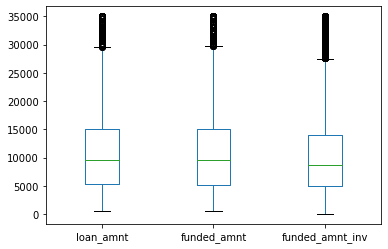

In [37]:
# Plotting 'loan_ammnt' columns
cleaned_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].plot.box()

<AxesSubplot:xlabel='annual_inc'>

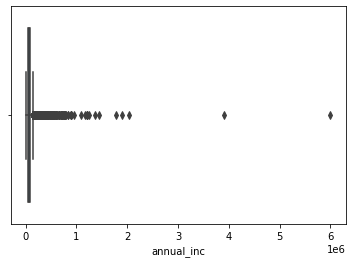

In [38]:
# Plotting 'annual_inc'
sns.boxplot(cleaned_data.annual_inc)

In [39]:
# Removing outliers from 'annual_inc' in the quantile .99
print('Before  Outliers Removal:\n')
print(cleaned_data.annual_inc.describe())

cleaned_data = cleaned_data[cleaned_data.annual_inc < cleaned_data.annual_inc.quantile(0.99)]

print('\nAfter Outliers Removal :')
print(cleaned_data.annual_inc.describe())

Before  Outliers Removal:

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64

After Outliers Removal :
count    38191.00
mean     65313.61
std      35150.77
min       4000.00
25%      40000.00
50%      58000.00
75%      80232.00
max     234000.00
Name: annual_inc, dtype: float64


#### Plot Loan Numeric Data

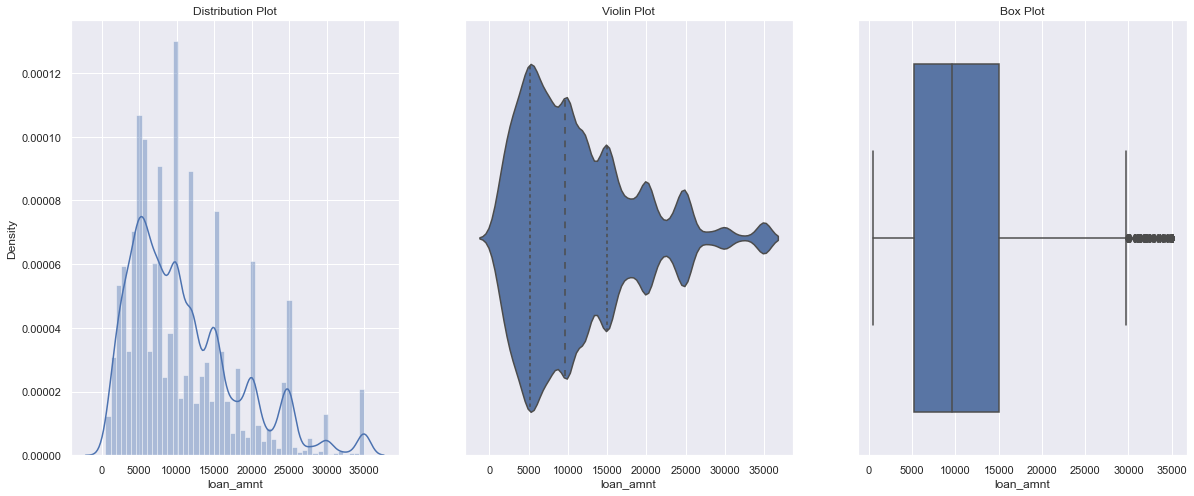

In [40]:
# Plotting Loan Numeric Data: 'loan_amnt'
univar_plot(cleaned_data, 'loan_amnt', 0)

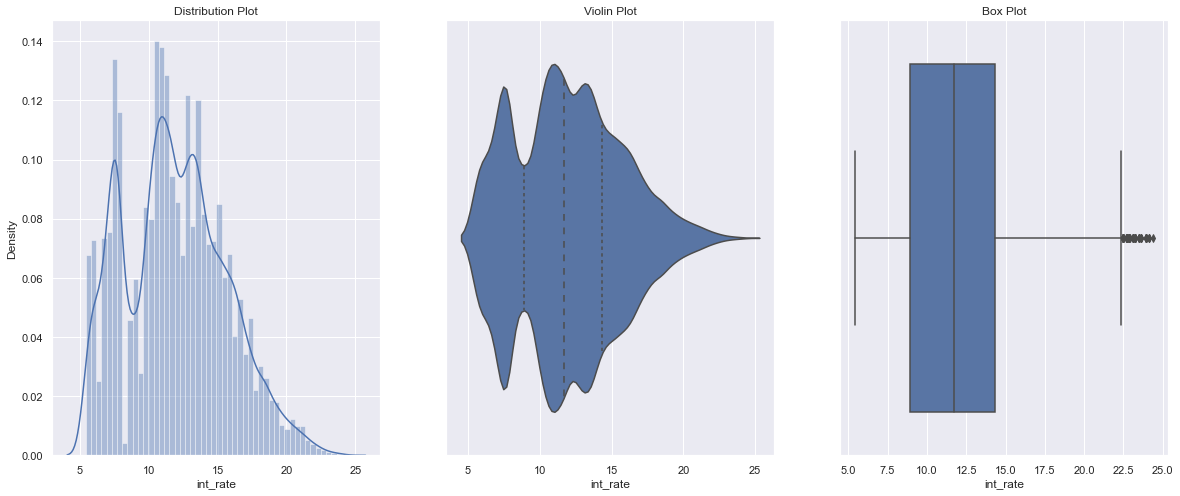

In [41]:
# Plotting Loan Numeric Data: 'int_rate'
univar_plot(cleaned_data, 'int_rate', 0)

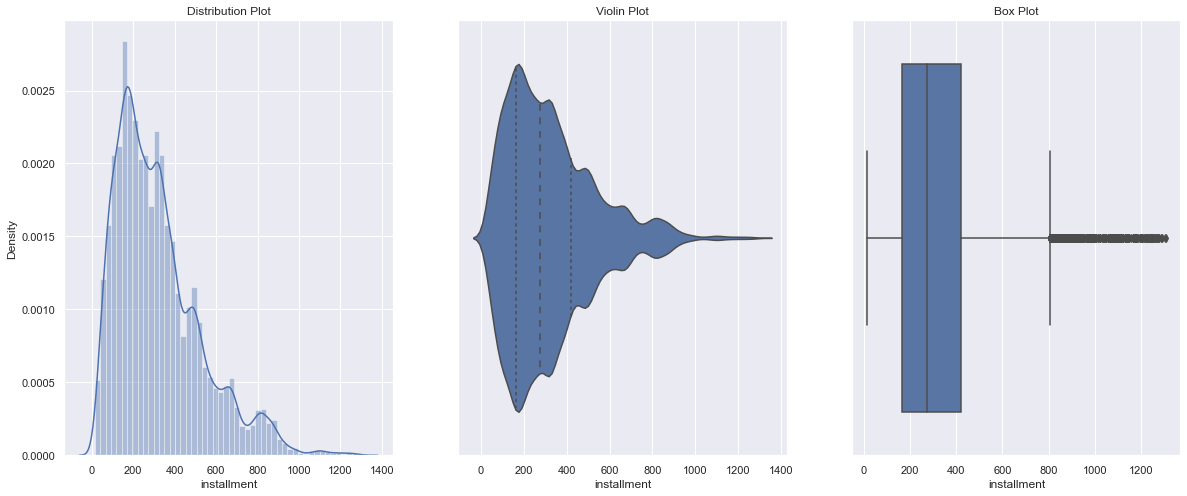

In [42]:
# Plotting Loan Numeric Data: 'installment'
univar_plot(cleaned_data, 'installment', 0)

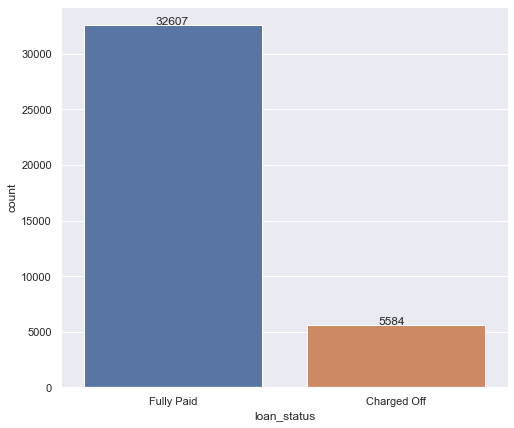

In [43]:
# Plotting Loan Categorical Data: 'loan_status'
univar_plot(cleaned_data, 'loan_status', 1)

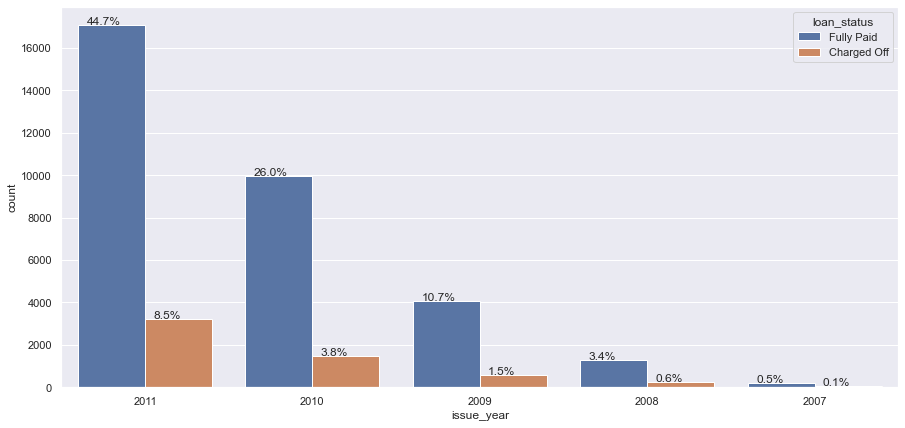

In [44]:
# Plotting Loan Categorical Data: 'issue_year'
univar_plot(cleaned_data, 'issue_year', 1, 'loan_status')

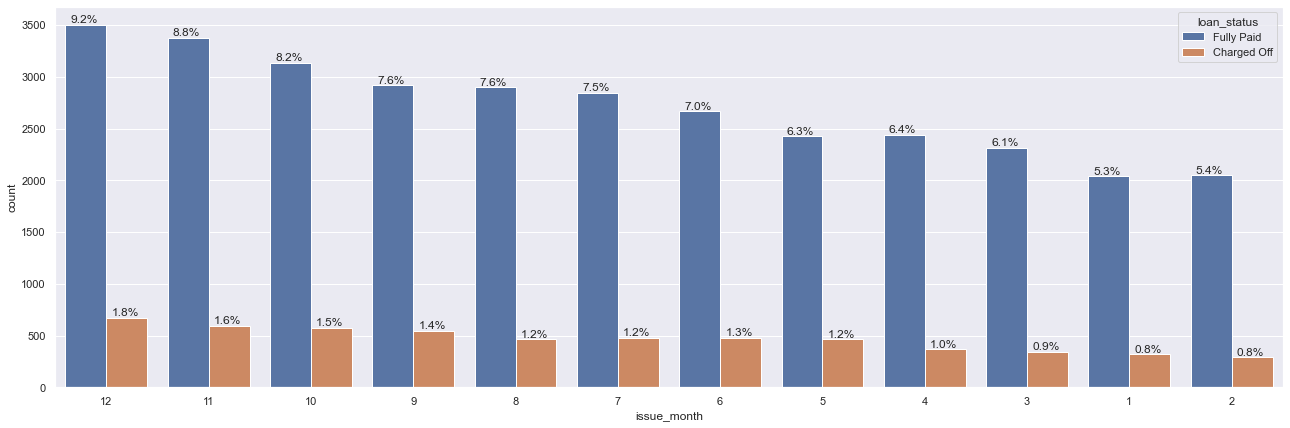

In [45]:
# Plotting Loan Categorical Data: 'issue_month'
univar_plot(cleaned_data, 'issue_month', 1, 'loan_status')

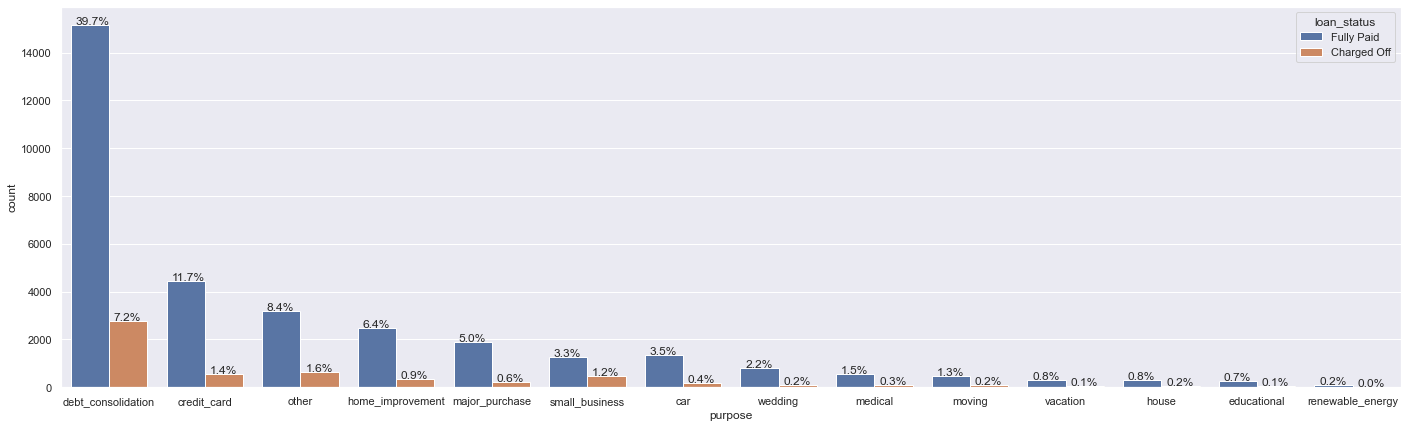

In [46]:
# Plotting Loan Categorical Data: 'purpose'
univar_plot(cleaned_data, 'purpose', 1, 'loan_status')

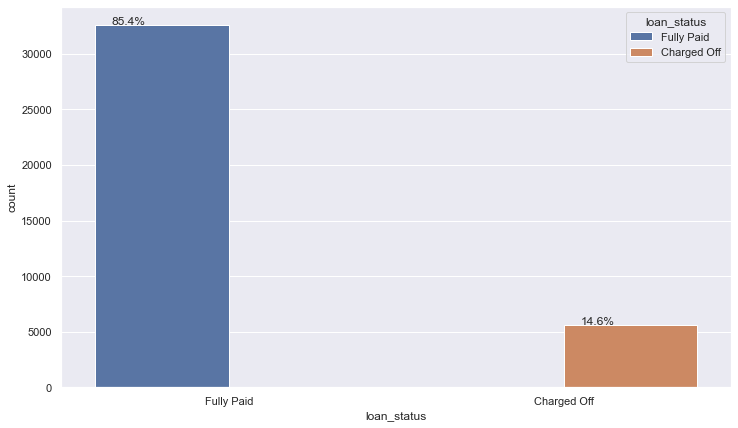

In [47]:
# Plotting Loan Categorical Data: 'loan_status'
univar_plot(cleaned_data, 'loan_status', 1, 'loan_status')

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

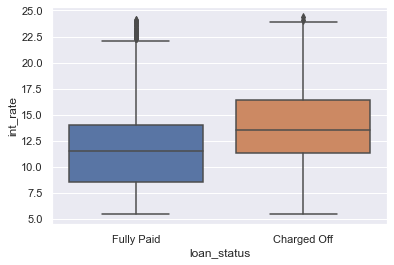

In [48]:
sns.boxplot(x = 'loan_status', y = 'int_rate', data = cleaned_data)

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

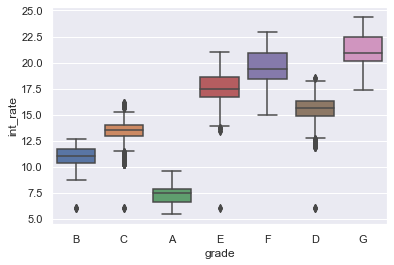

In [49]:
sns.boxplot(x = 'grade', y = 'int_rate', data = cleaned_data)

#### Plot Customer Numeric Data

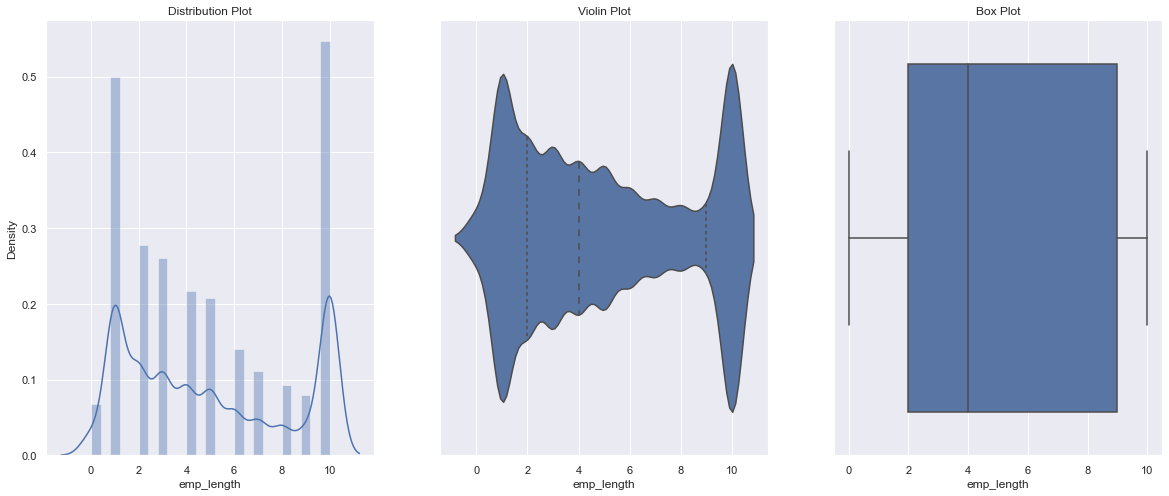

In [50]:
# Plotting Customer Numeric Data: 'emp_length'
univar_plot(cleaned_data, 'emp_length', 0) 

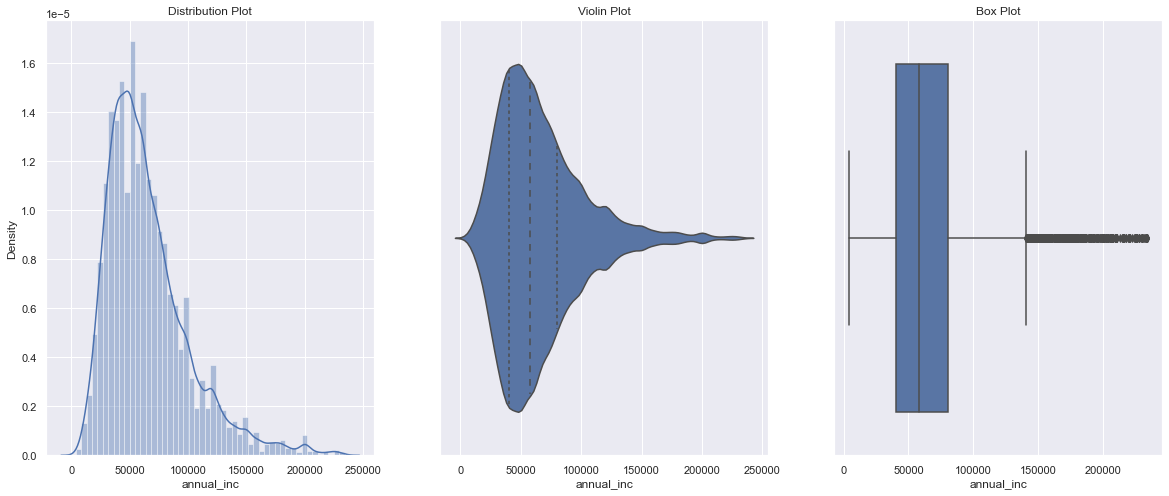

In [51]:
# Plotting Customer Numeric Data: 'annual_inc'
univar_plot(cleaned_data, 'annual_inc', 0)

#### Plot Customer Categorical Data

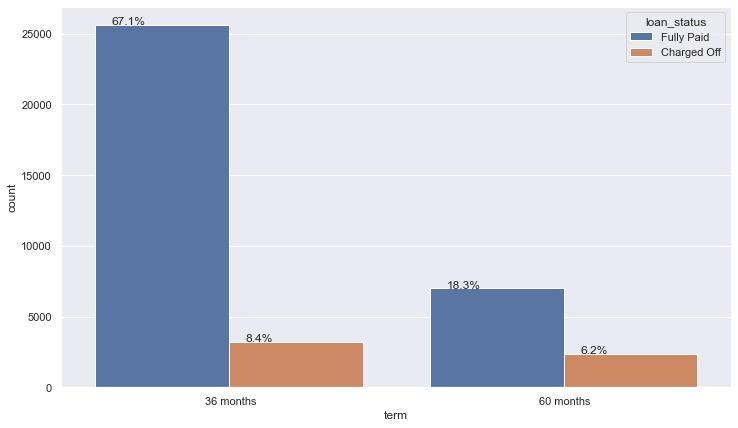

In [52]:
# Plotting Customer Categorical Data: 'term'
univar_plot(cleaned_data, 'term', 1, 'loan_status')

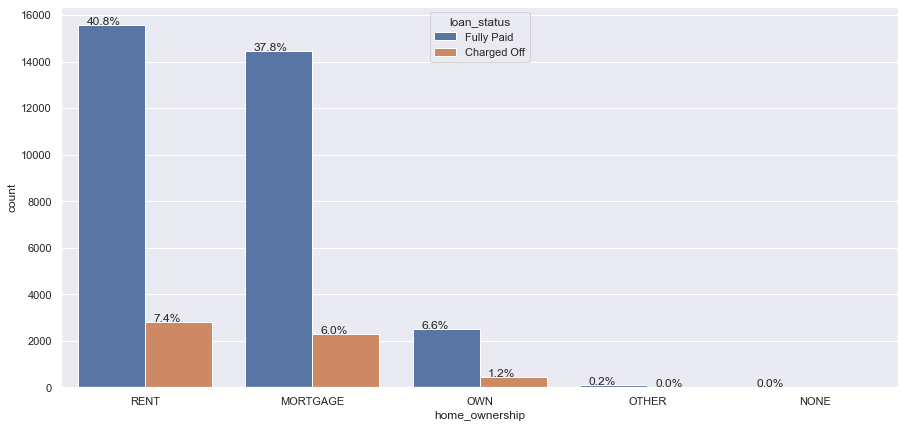

In [53]:
# Plotting Customer Categorical Data: 'home_ownership'
univar_plot(cleaned_data, 'home_ownership', 1, 'loan_status')

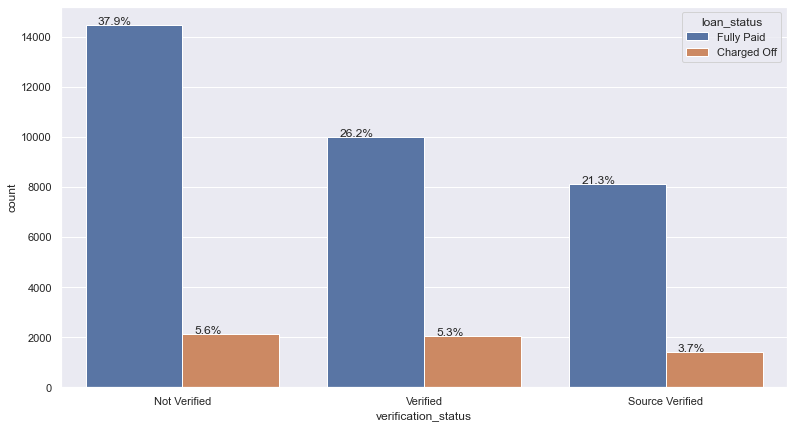

In [54]:
# Plotting Customer Categorical Data: 'verification_status'
univar_plot(cleaned_data, 'verification_status', 1, 'loan_status')

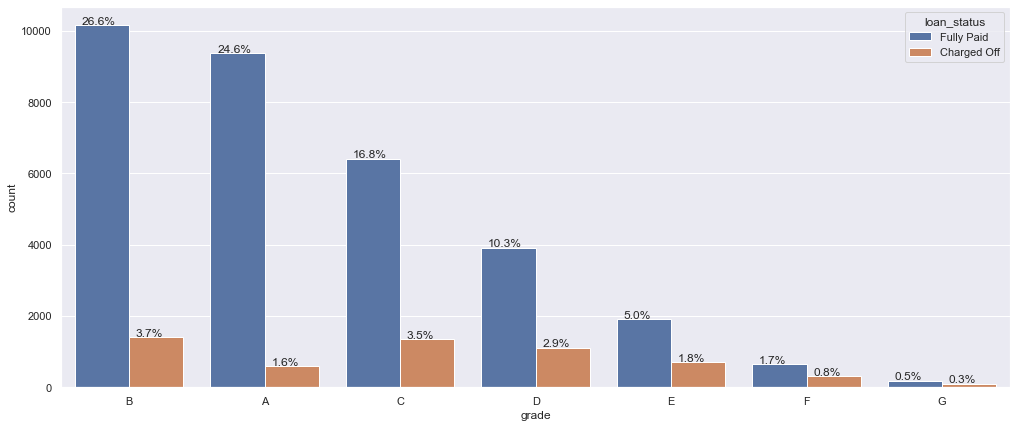

In [55]:
# Plotting Customer Categorical Data: 'grade'
univar_plot(cleaned_data, 'grade', 1, 'loan_status')

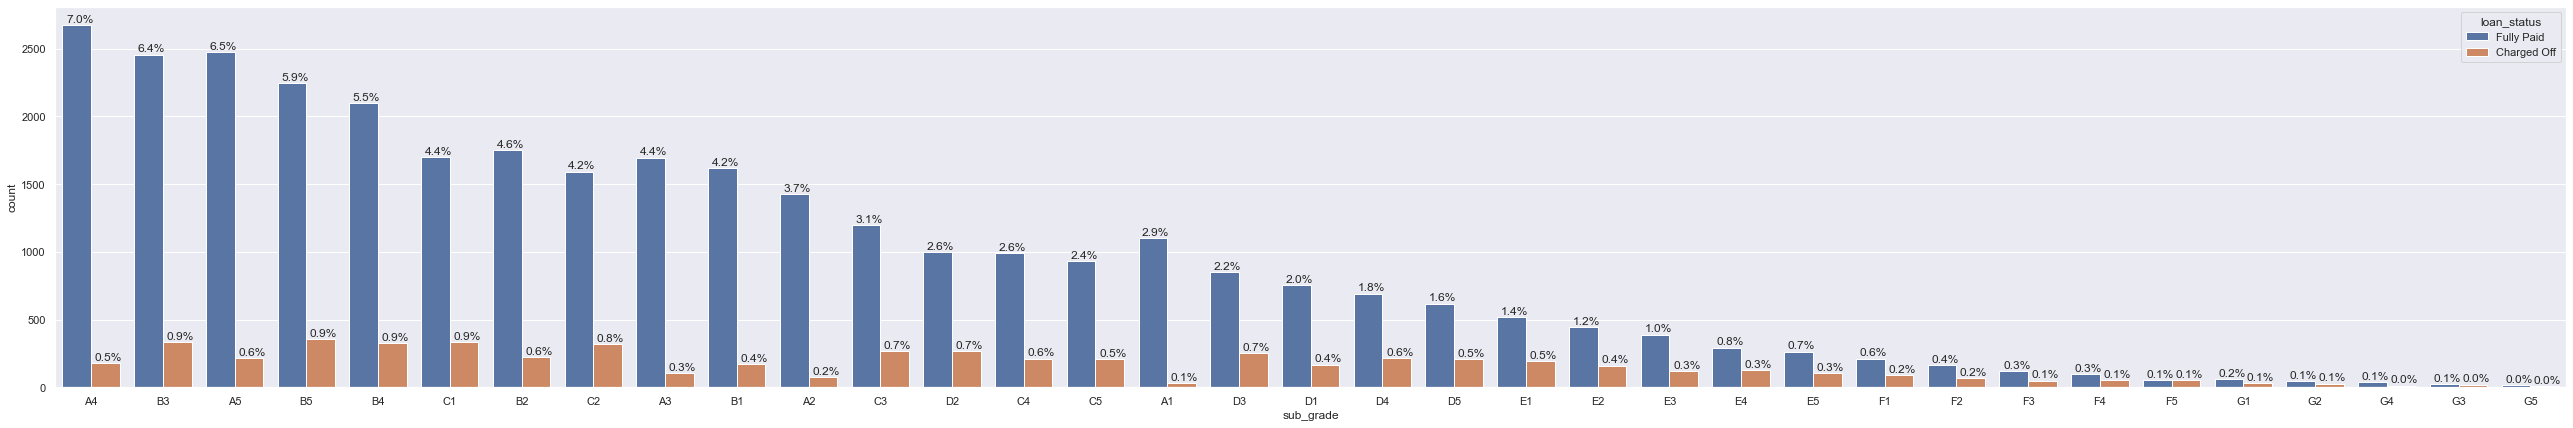

In [56]:
# Plotting Customer Categorical Data: 'sub_grade'
univar_plot(cleaned_data, 'sub_grade', 1, 'loan_status')

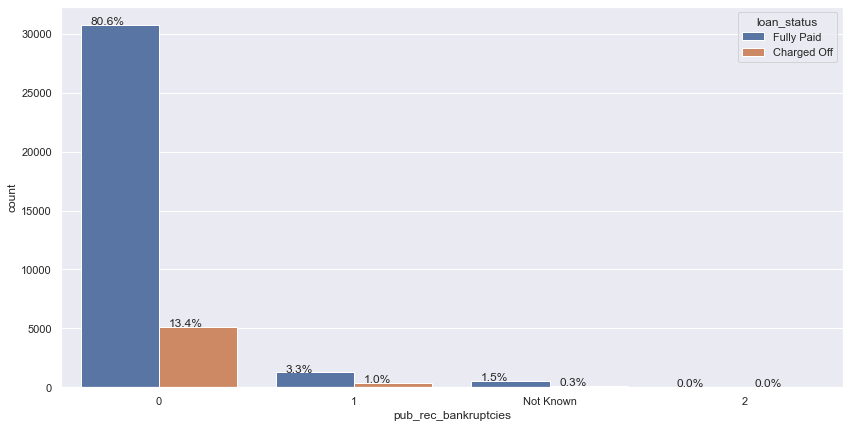

In [57]:
# Plotting Customer Categorical Data: 'pub_rec_bankruptcies'
univar_plot(cleaned_data, 'pub_rec_bankruptcies', 1, 'loan_status')

In [58]:
# Value Count of Customer Categorical Data: 'title'
print(cleaned_data.title.value_counts())
print()
print(cleaned_data.title.value_counts()*100/cleaned_data.title.count())

Debt Consolidation         2068
Debt Consolidation Loan    1607
Personal Loan               634
Consolidation               485
debt consolidation          471
                           ... 
Mobile Loan                   1
Our Sanctuary                 1
pokerbeat                     1
freddys loan                  1
Stuff                         1
Name: title, Length: 19133, dtype: int64

Debt Consolidation        5.42
Debt Consolidation Loan   4.21
Personal Loan             1.66
Consolidation             1.27
debt consolidation        1.23
                          ... 
Mobile Loan               0.00
Our Sanctuary             0.00
pokerbeat                 0.00
freddys loan              0.00
Stuff                     0.00
Name: title, Length: 19133, dtype: float64


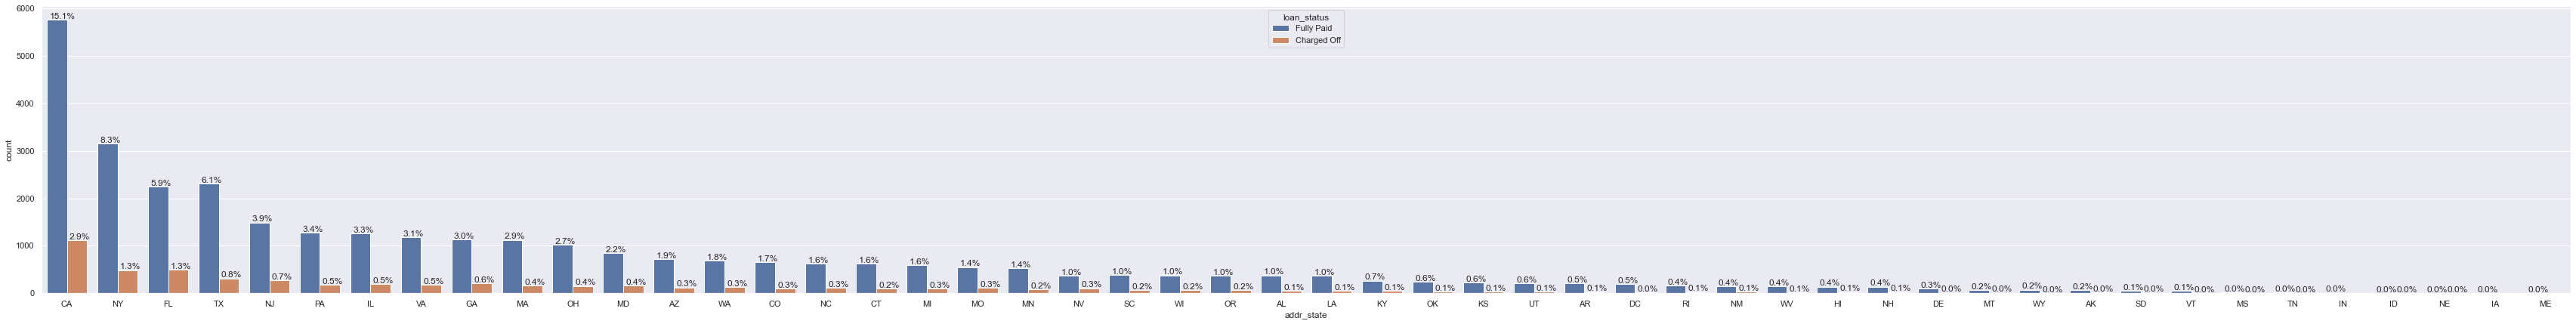

In [59]:
# Plotting Customer Categorical Data: 'addr_state'
univar_plot(cleaned_data, 'addr_state', 1, 'loan_status')

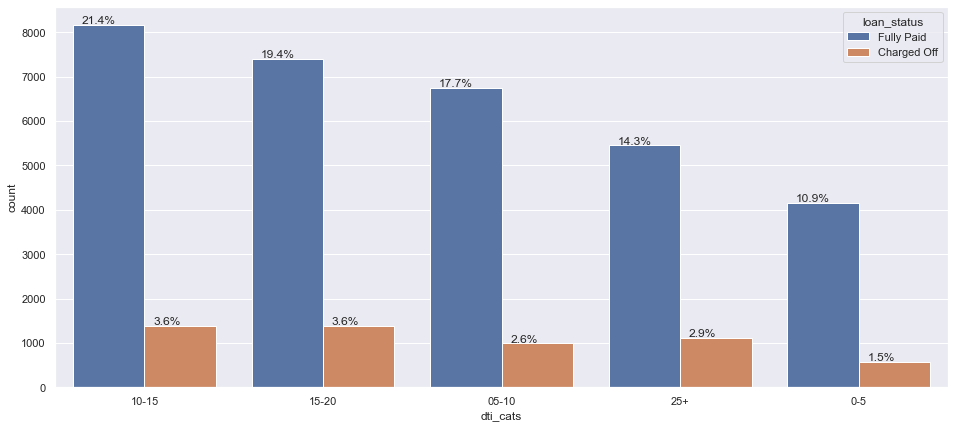

In [60]:
# Value Count of Customer Categorical Data: 'dti_cats'
univar_plot(cleaned_data, 'dti_cats', 1, 'loan_status')

### Bivariable Analysis

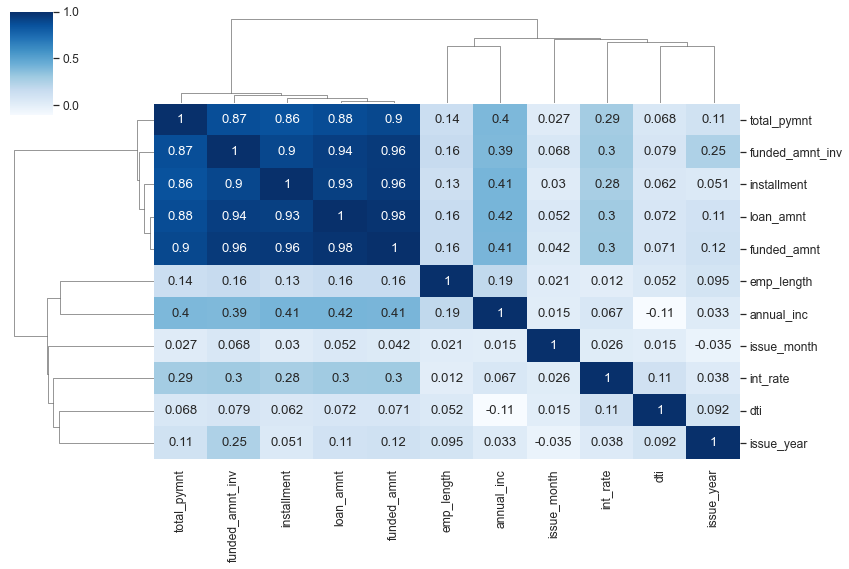

In [61]:
# Plotting Heatmap with Dendogram(clustermap) to show closeness among numerical variables.
## This matrix gives us a first impression of the relation of the numeric variables

corr = cleaned_data.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

## Description:
## * As mentioned before: Loan amount, investor amount, funding amount are strongly correlated.
## * Annual_income is negatively correlated to DTI(Debt-to-income ratio).
## * Positive correlation between annual income and employment years.

In [62]:
# Data-Cleanning
## Total 'total_pymnt' field does not exist at the moment of the giving the loan. We will drop the field
## Dropping redundant fields related to the 'loan_amnt'. They show high correlation in the corr-matrix
drop_columns = ['total_pymnt', 'funded_amnt_inv', 'funded_amnt', 'installment']

cleaned_data.drop(columns=drop_columns, inplace=True)

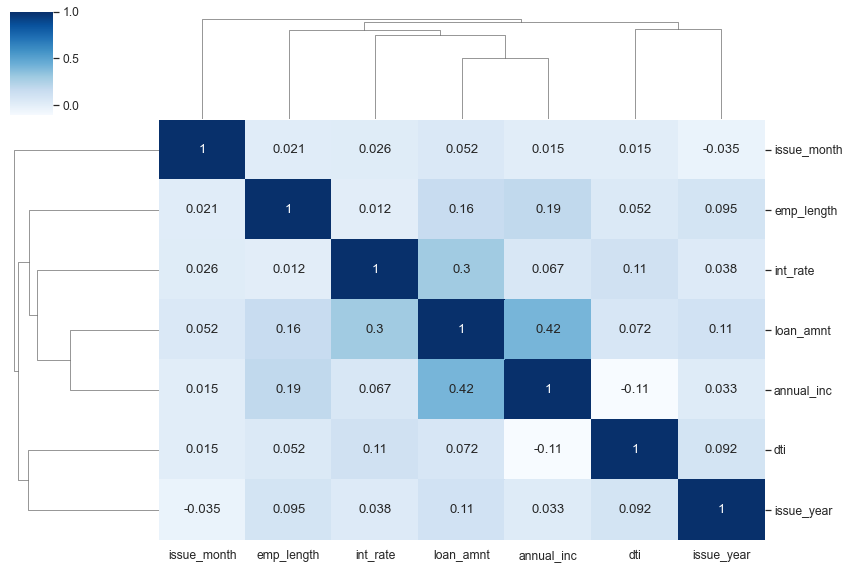

In [63]:
corr = cleaned_data.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

In [64]:
cleaned_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'issue_year', 'issue_month', 'loan_amnt_cats', 'annual_inc_cats',
       'int_rate_cats', 'dti_cats'],
      dtype='object')

#### Plot Loan Categorical Data

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

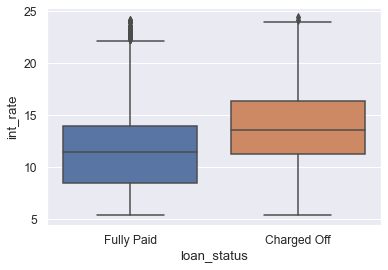

In [65]:
sns.boxplot(x = 'loan_status', y = 'int_rate', data = cleaned_data)

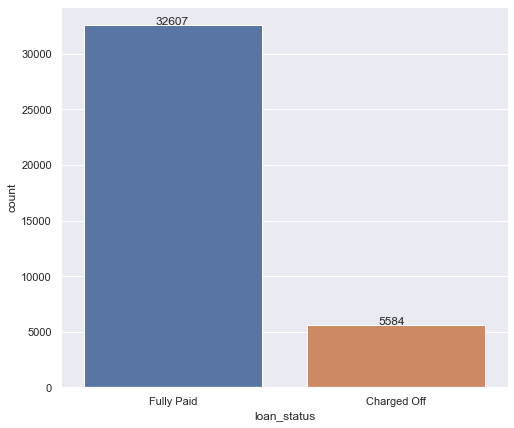

In [66]:
# Plotting Loan Categorical Data: 'loan_status'
univar_plot(cleaned_data, 'loan_status', 1)

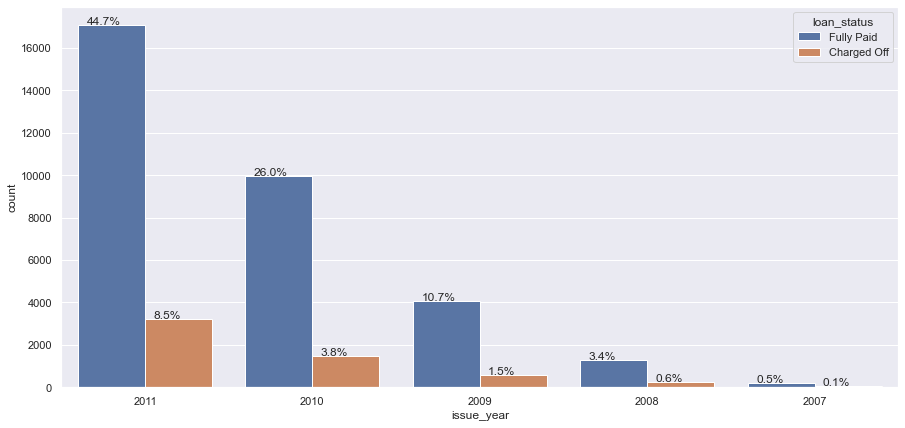

In [67]:
# Plotting Loan Categorical Data: 'issue_year'
univar_plot(cleaned_data, 'issue_year', 1, 'loan_status')

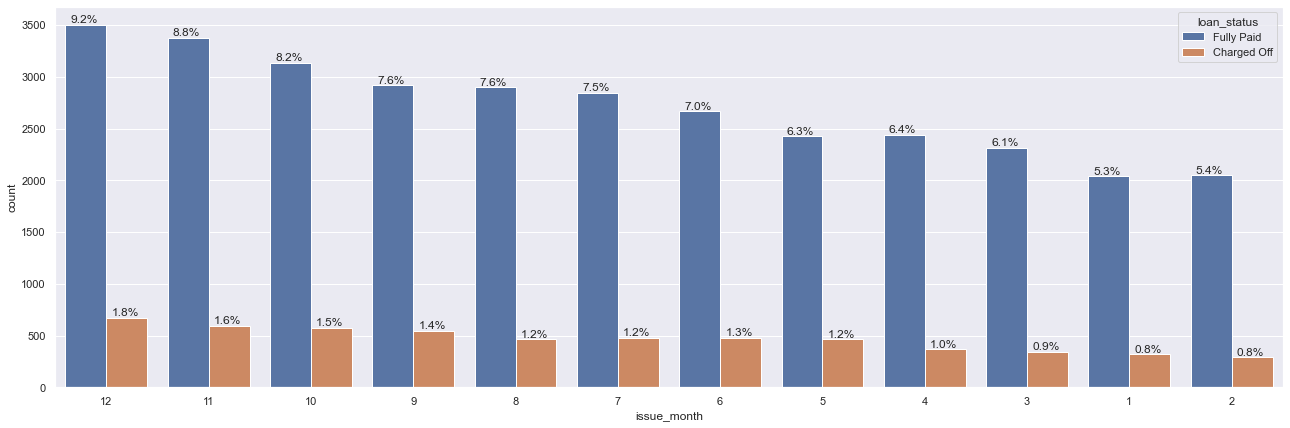

In [68]:
# Plotting Loan Categorical Data: 'issue_month'
univar_plot(cleaned_data, 'issue_month', 1, 'loan_status')

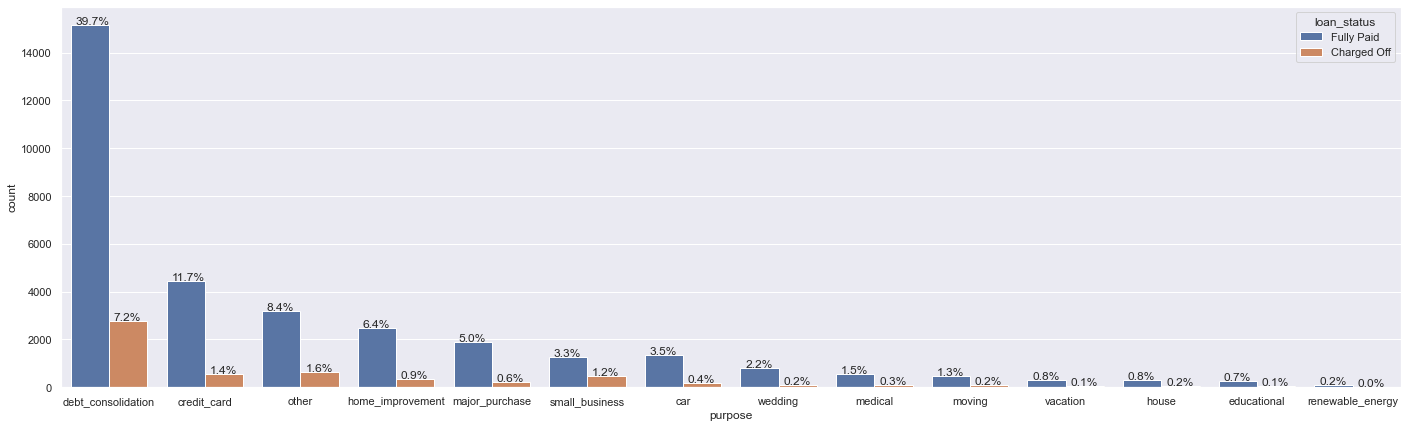

In [69]:
# Plotting Loan Categorical Data: 'purpose'
univar_plot(cleaned_data, 'purpose', 1, 'loan_status')

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

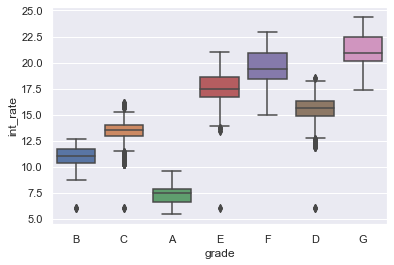

In [70]:
sns.boxplot(x = 'grade', y = 'int_rate', data = cleaned_data)

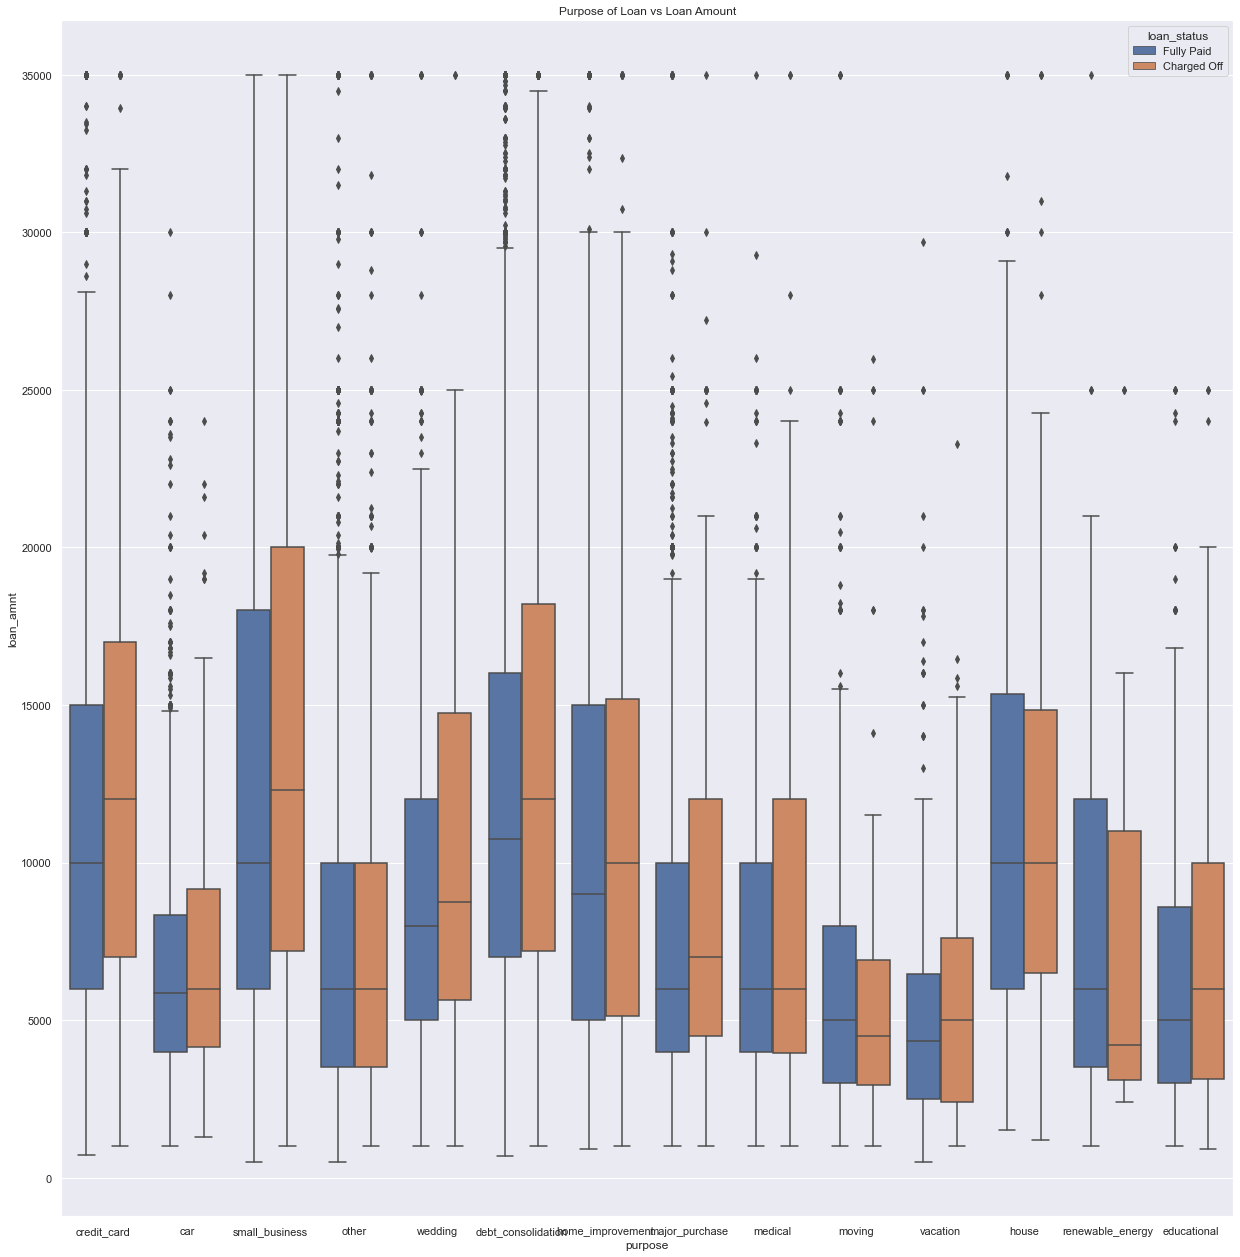

In [71]:
plt.figure(figsize=(21,22))
sns.boxplot(data=cleaned_data, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

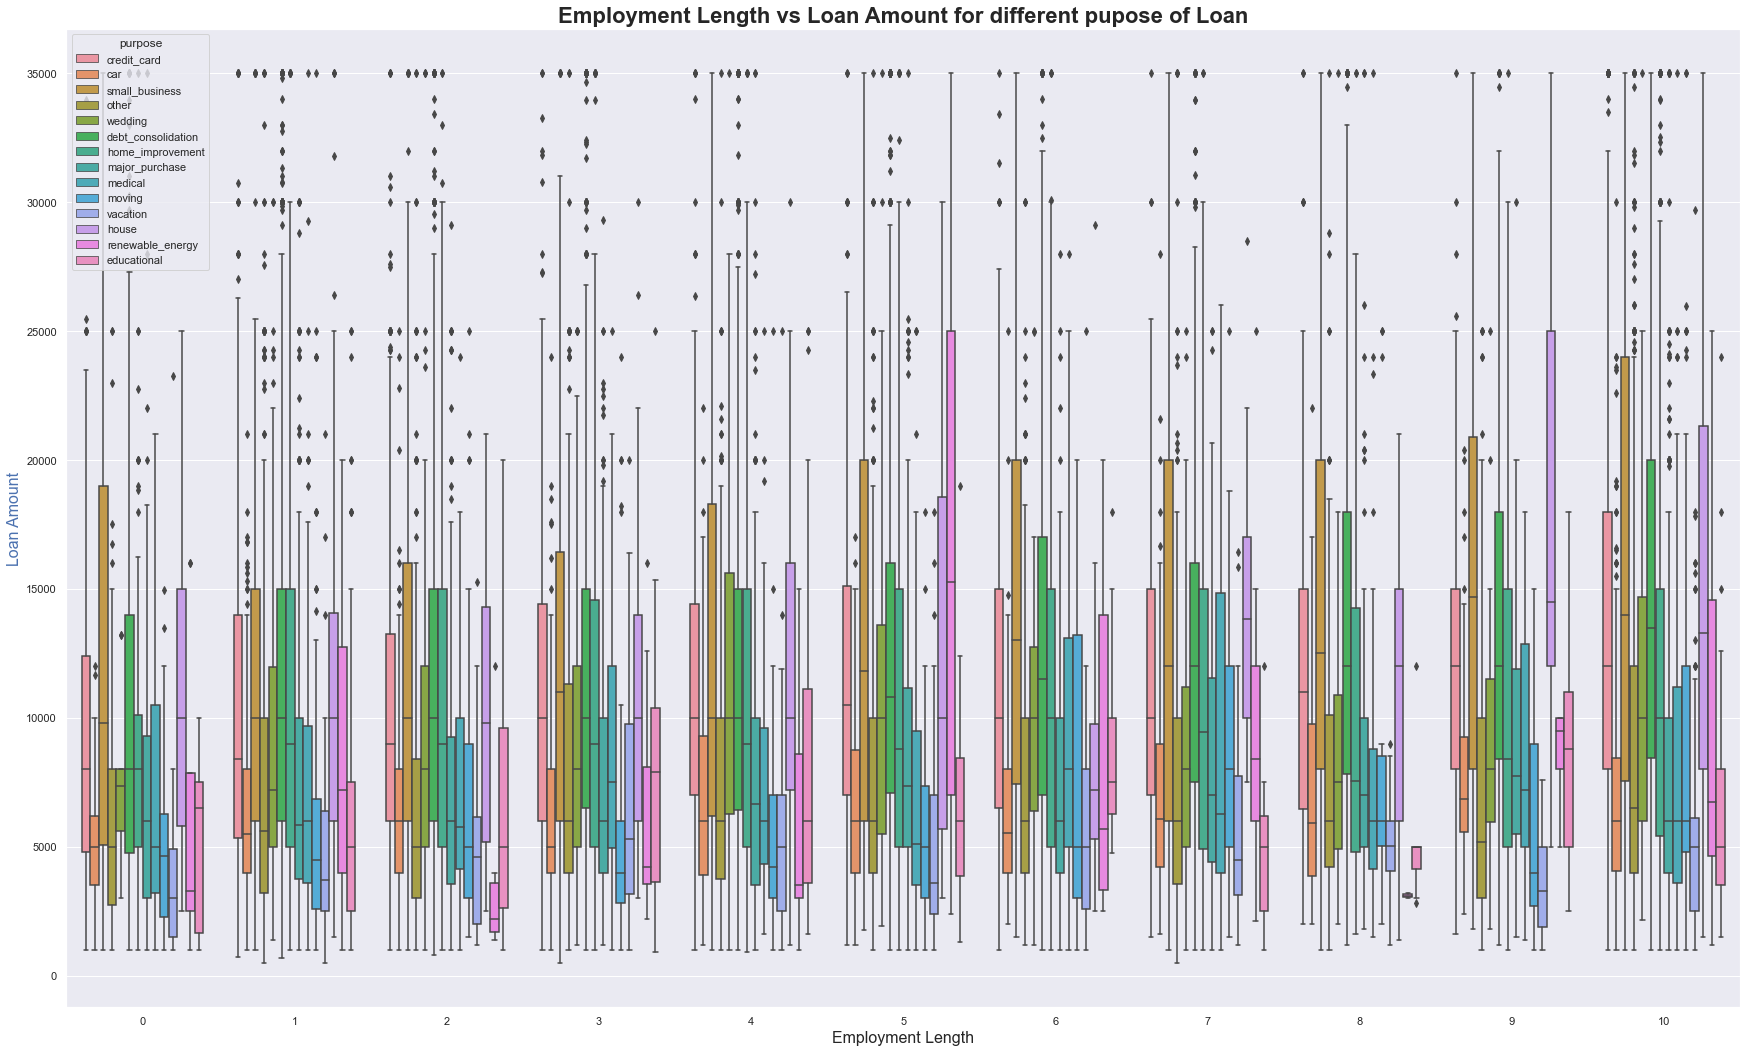

In [72]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=cleaned_data)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

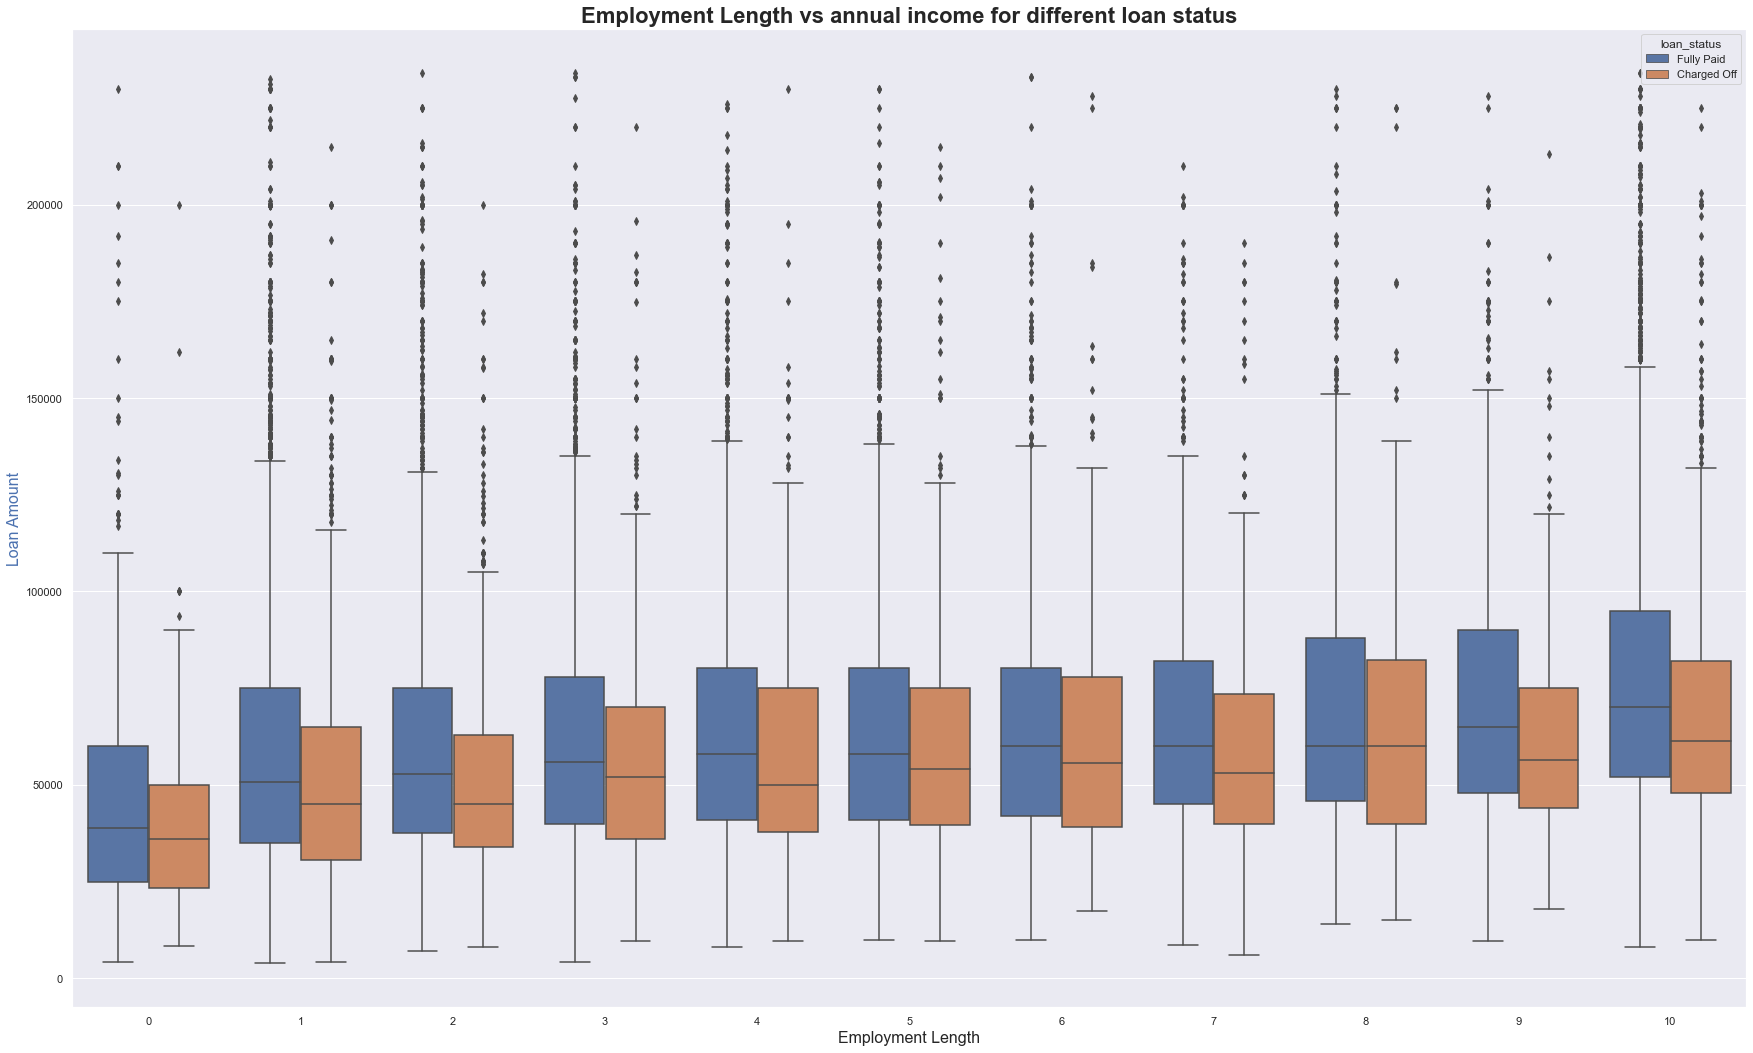

In [73]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='annual_inc',hue='loan_status',data=cleaned_data)
ax.set_title('Employment Length vs annual income for different loan status',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

## Conclusions and Observations

In [78]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan_status = cleaned_data.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan_status['Total'] = inc_range_vs_loan_status['Charged Off'] + inc_range_vs_loan_status['Fully Paid'] 
inc_range_vs_loan_status['ChargedOff_Prop'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan_status.sort_values('ChargedOff_Prop', ascending=False)

# Analysis:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion decreases. 

loan_status,annual_inc_cats,Charged Off,Fully Paid,Total,ChargedOff_Prop
0,0-20000,237,943,1180,0.20
1,20000-40000,1514,7004,8518,0.18
2,40000-60000,1729,9534,11263,0.15
3,60000-80000,1024,6597,7621,0.13
4,80000+,1080,8529,9609,0.11


In [84]:
# Bivariate Analysis on purpose of Loan against ChargedOff_Prop.

purpose_vs_loan_status = cleaned_data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan_status['Total'] = purpose_vs_loan_status['Charged Off'] +  purpose_vs_loan_status['Fully Paid'] 
purpose_vs_loan_status['ChargedOff_Prop'] = purpose_vs_loan_status['Charged Off'] / purpose_vs_loan_status['Total']
purpose_vs_loan_status.sort_values('ChargedOff_Prop', ascending=False)

## Analysis:
## Small Business applicants have high chances of getting charged off.
## 'renewable_energy' where charged off proportion is better as compare to other categories.

loan_status,purpose,Charged Off,Fully Paid,Total,ChargedOff_Prop
11,small_business,472,1251,1723,0.27
10,renewable_energy,19,81,100,0.19
3,educational,55,268,323,0.17
9,other,629,3202,3831,0.16
5,house,58,299,357,0.16
8,moving,91,479,570,0.16
7,medical,106,568,674,0.16
2,debt_consolidation,2752,15165,17917,0.15
12,vacation,53,322,375,0.14
4,home_improvement,338,2459,2797,0.12


In [85]:
# Bivariate Analysis on grade against ChargedOff_Prop

grade_vs_loan_status = cleaned_data.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan_status['Total'] = grade_vs_loan_status['Charged Off'] + grade_vs_loan_status['Fully Paid'] 
grade_vs_loan_status['ChargedOff_Prop'] = grade_vs_loan_status['Charged Off'] / grade_vs_loan_status['Total']
grade_vs_loan_status.sort_values('ChargedOff_Prop', ascending=False)

## Analysis:
## Grade "A" has very less chances of charged off.
## Grade "F" and "G" have very high chances of charged off.
## Chances of charged off is increasing with grade moving from "A" towards "G"

loan_status,grade,Charged Off,Fully Paid,Total,ChargedOff_Prop
6,G,99,190,289,0.34
5,F,312,642,954,0.33
4,E,704,1906,2610,0.27
3,D,1112,3915,5027,0.22
2,C,1342,6411,7753,0.17
1,B,1414,10167,11581,0.12
0,A,601,9376,9977,0.06


In [87]:
# Bivariate Analysis on sub grade against ChargedOff_Prop

grade_vs_loan_status = cleaned_data.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan_status['Total'] = grade_vs_loan_status['Charged Off'] + grade_vs_loan_status['Fully Paid'] 
grade_vs_loan_status['ChargedOff_Prop'] = grade_vs_loan_status['Charged Off'] / grade_vs_loan_status['Total']
grade_vs_loan_status.sort_values('ChargedOff_Prop', ascending=False)

## Analysis:
## sub Grades of "A" has very less chances of charged off.
## sub Grades of "F" and "G" have very high chances of charged off.
## proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

loan_status,sub_grade,Charged Off,Fully Paid,Total,ChargedOff_Prop
29,F5,53,55,108,0.49
32,G3,19,25,44,0.43
31,G2,27,47,74,0.36
34,G5,10,18,28,0.36
28,F4,52,96,148,0.35
30,G1,31,61,92,0.34
23,E4,126,293,419,0.30
26,F2,69,162,231,0.30
27,F3,50,118,168,0.30
25,F1,88,211,299,0.29


In [89]:
# Bivariate Analysis on employment length against Chargedoff_Prop

emplen_vs_loan_status = cleaned_data.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan_status['Total'] = emplen_vs_loan_status['Charged Off'] + emplen_vs_loan_status['Fully Paid'] 
emplen_vs_loan_status['ChargedOff_Prop'] = emplen_vs_loan_status['Charged Off'] / emplen_vs_loan_status['Total']
emplen_vs_loan_status.sort_values('ChargedOff_Prop', ascending=False)

# Analysis:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

loan_status,emp_length,Charged Off,Fully Paid,Total,ChargedOff_Prop
0,0,227,801,1028,0.22
10,10,1316,7038,8354,0.16
7,7,262,1435,1697,0.15
5,5,456,2712,3168,0.14
8,8,203,1216,1419,0.14
1,1,1090,6532,7622,0.14
6,6,305,1846,2151,0.14
3,3,551,3426,3977,0.14
4,4,456,2859,3315,0.14
2,2,561,3684,4245,0.13


In [91]:
# Bivariate Analysis on address state against Chargedoff_Proportion

state_vs_loan_status = cleaned_data.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan_status['Total'] = state_vs_loan_status['Charged Off'] + state_vs_loan_status['Fully Paid'] 
state_vs_loan_status['Chargedoff_Prop'] = state_vs_loan_status['Charged Off'] / state_vs_loan_status['Total']
state_vs_loan_status.sort_values('Chargedoff_Prop', ascending=False)

## Analysis:
## states NE has very high chances of charged off but number of applications are too low to make any decisions.
## NV,CA and FL states shows good number of charged offs in good number of applications.

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Prop
28,NE,3.00,2.00,5.00,0.60
32,NV,107.00,368.00,475.00,0.23
40,SD,12.00,50.00,62.00,0.19
0,AK,14.00,63.00,77.00,0.18
9,FL,497.00,2252.00,2749.00,0.18
24,MO,114.00,551.00,665.00,0.17
11,HI,28.00,138.00,166.00,0.17
31,NM,30.00,149.00,179.00,0.17
13,ID,1.00,5.00,6.00,0.17
36,OR,71.00,364.00,435.00,0.16


In [93]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

bankruptcies_vs_loan_status = cleaned_data.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan_status['Total']=bankruptcies_vs_loan_status['Charged Off'] + bankruptcies_vs_loan_status['Fully Paid'] 
bankruptcies_vs_loan_status['Chargedoff_Proportion'] = bankruptcies_vs_loan_status['Charged Off'] / bankruptcies_vs_loan_status['Total']
bankruptcies_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)

## Analysis:
## Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
## pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
## Not known is the column for which we don't have any information abount borrower.
## This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,2,2,3,5,0.40
1,1,365,1268,1633,0.22
3,Not Known,116,572,688,0.17
0,0,5101,30764,35865,0.14
